In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy import stats
from scipy.stats import pearsonr

In [ ]:
df = pd.read_excel("default of credit card clients.xls")
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.drop(['ID'], axis = 1)


df['default payment next month'] = df['default payment next month'].astype(bool)
df_corr = df.copy()

In [ ]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,True
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,True
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,False
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,False
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,False
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,False
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,True
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,True


In [ ]:
print(df.describe())

0       LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  PAY_3  \
count       30000  30000      30000     30000  30000  30000  30000  30000   
unique         81      2          7         4     56     11     11     11   
top         50000      2          2         2     29      0      0      0   
freq         3365  18112      14030     15964   1605  14737  15730  15764   

0       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
count   30000  30000  ...      30000      30000      30000     30000   
unique     11     10  ...      21548      21010      20604      7943   
top         0      0  ...          0          0          0         0   
freq    16455  16947  ...       3195       3506       4020      5249   

0       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
count      30000     30000     30000     30000     30000   
unique      7899      7518      6937      6897      6939   
top            0         0         0         0         0   
freq        5

In [ ]:
df = df[df['MARRIAGE'] != 0]

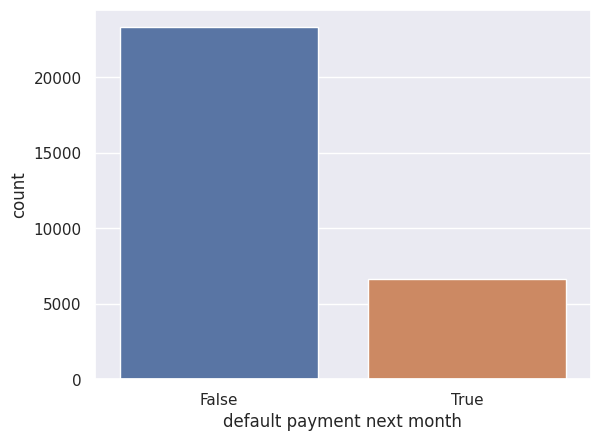

In [ ]:
# Check the class distribution
sns.countplot(x="default payment next month", data=df)
plt.show()


In [ ]:
# Count number of males and females
male_count = df[df["SEX"] == 1]["SEX"].count()
female_count = df[df["SEX"] == 2]["SEX"].count()



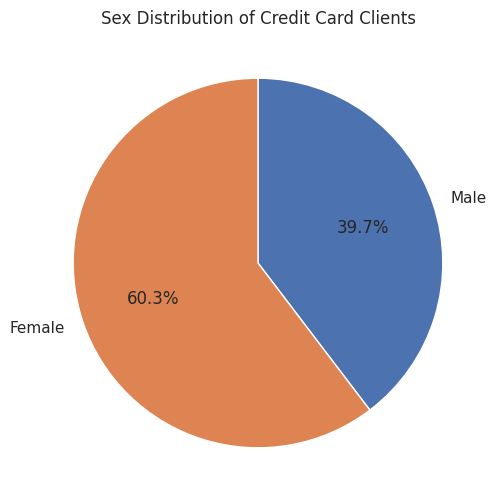

In [ ]:
# Create a list of counts and corresponding labels
counts = [male_count, female_count]
labels = ["Male", "Female"]

# Create pie chart using Seaborn
sns.set()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct="%1.1f%%", startangle=90, counterclock=False)
plt.title("Sex Distribution of Credit Card Clients")
plt.show()

<ipython-input-63-9c1e643a528e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})


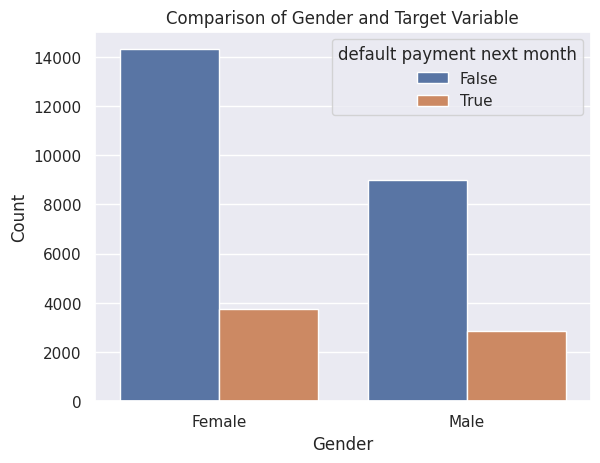

In [ ]:
# create a count plot to compare number of males and females against the target variable

# Replace target variable 1 and 2 with male and female
df['SEX'] = df['SEX'].replace({1:'Male', 2:'Female'})

sns.countplot(x='SEX', hue='default payment next month', data=df)

# set plot title and axis labels
plt.title('Comparison of Gender and Target Variable')
plt.xlabel('Gender')
plt.ylabel('Count')

# display the plot
plt.show()



<ipython-input-64-7c3a453c8685>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MARRIAGE'] = df['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others'})


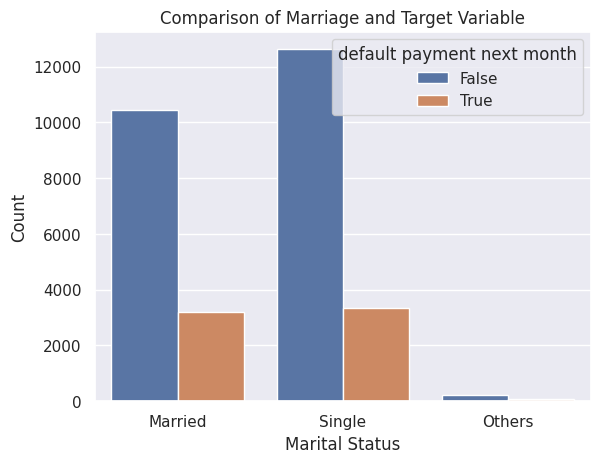

In [ ]:
# create a count plot to compare number of males and females against the target variable

# Replace target variable 1 and 2 with male and female
df['MARRIAGE'] = df['MARRIAGE'].replace({1:'Married', 2:'Single', 3:'Others'})

sns.countplot(x='MARRIAGE', hue='default payment next month', data=df)

# set plot title and axis labels
plt.title('Comparison of Marriage and Target Variable')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# display the plot
plt.show()

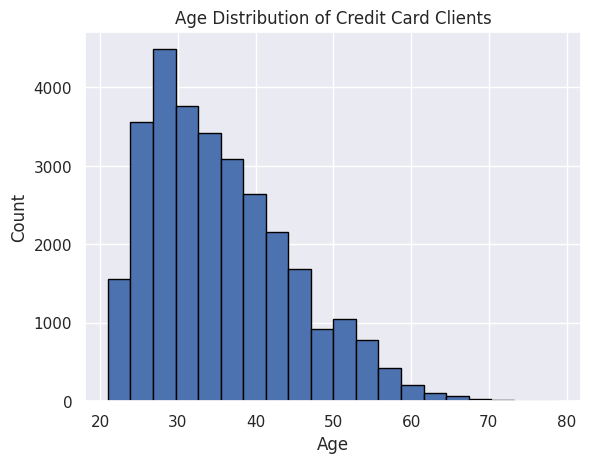

In [ ]:
# Plot histogram
plt.hist(df["AGE"], bins=20, edgecolor='black')
plt.title("Age Distribution of Credit Card Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()




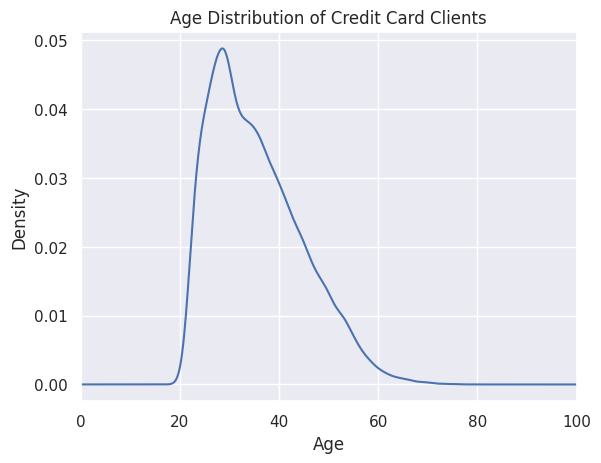

In [ ]:
# Plot density plot
plt.figure()
df["AGE"].plot(kind="density", xlim=(0, 100))
plt.title("Age Distribution of Credit Card Clients")
plt.xlabel("Age")
plt.show()

In [ ]:
# calculate correlation coefficients and p-values between each feature and the target variable
corr_with_target, p_vals = [], []
for col in df_corr.columns[:-1]:
    corr, p_val = stats.pearsonr(df_corr[col], df_corr['default payment next month'])
    corr_with_target.append(corr)
    p_vals.append(p_val)

In [ ]:
# create a DataFrame of correlation coefficients and p-values
results = pd.DataFrame({'feature': df_corr.columns[:-1], 'corr_with_target': corr_with_target, 'p_value': p_vals})

In [ ]:
# sort the DataFrame by absolute correlation coefficient in descending order
results = results.reindex(results['corr_with_target'].abs().sort_values(ascending=False).index)

In [ ]:
results

,feature,corr_with_target,p_value
5,PAY_0,0.324794,0.000000e+00
6,PAY_2,0.263551,0.000000e+00
7,PAY_3,0.235253,0.000000e+00
8,PAY_4,0.216614,1.899297e-315
9,PAY_5,0.204149,1.126608e-279
10,PAY_6,0.186866,7.296740e-234
0,LIMIT_BAL,-0.153520,1.302244e-157
17,PAY_AMT1,-0.072929,1.146488e-36
18,PAY_AMT2,-0.058579,3.166657e-24
20,PAY_AMT4,-0.056827,6.830942e-23


In [ ]:
# Split the dataset into features and target
X = df_corr.drop("default payment next month", axis=1)
y = df_corr["default payment next month"]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


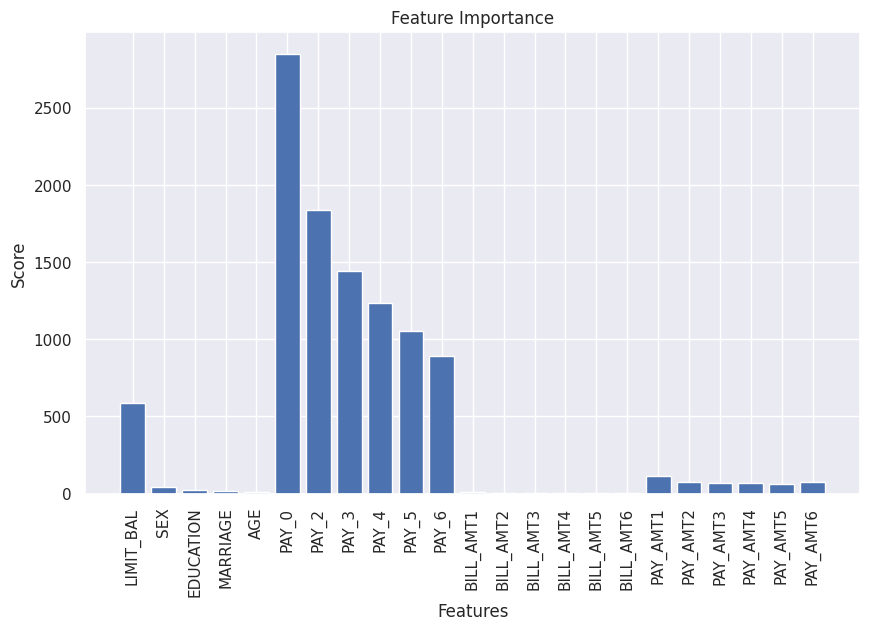

In [ ]:
# Feature selection
fs = SelectKBest(score_func=f_classif, k=10)
X_train = fs.fit_transform(X_train, y_train)
X_test = fs.transform(X_test)

# Plot feature importance
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xticks(range(len(df.columns)-1), df.columns[:-1], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [ ]:
# train and evaluate models
models = {
    "ANN": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier()
    
}

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Auc": []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)
    results["Auc"].append(auc_score)

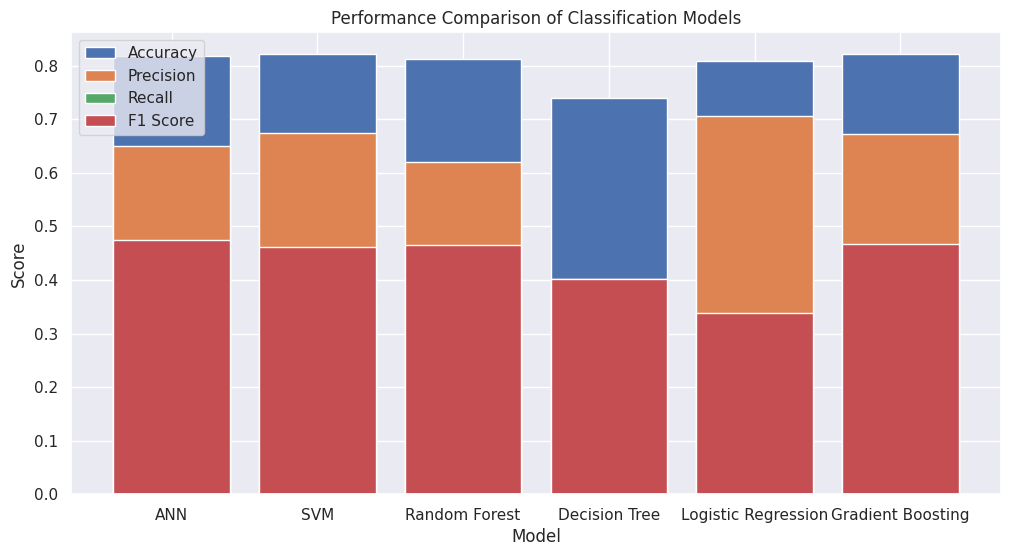

In [ ]:
# plot bar chart of results
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(results["Model"], results["Accuracy"], label="Accuracy")
ax.bar(results["Model"], results["Precision"], label="Precision")
ax.bar(results["Model"], results["Recall"], label="Recall")
ax.bar(results["Model"], results["F1 Score"], label="F1 Score")
ax.set_title("Performance Comparison of Classification Models")
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.legend()
plt.show()

In [ ]:
results

{'Model': ['ANN',
  'SVM',
  'Random Forest',
  'Decision Tree',
  'Logistic Regression',
  'Gradient Boosting'],
 'Accuracy': [0.8188333333333333,
  0.8208333333333333,
  0.8126666666666666,
  0.7386666666666667,
  0.8095,
  0.8211666666666667],
 'Precision': [0.6494708994708994,
  0.673469387755102,
  0.6203821656050955,
  0.4024483550114767,
  0.7053140096618358,
  0.671919770773639],
 'Recall': [0.37395277989337394,
  0.3518659558263519,
  0.3709063214013709,
  0.4006092916984006,
  0.22239146991622238,
  0.3571972581873572],
 'F1 Score': [0.47462542290961807,
  0.4622311155577789,
  0.4642516682554814,
  0.40152671755725183,
  0.33815865662999417,
  0.46643460964694183],
 'Auc': [0.658706707847263,
  0.6520370956857384,
  0.6536631030945408,
  0.6169890921901433,
  0.5981810133878104,
  0.65416935663795]}

In [ ]:
# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)


AUC Score: 0.65416935663795
